Author: Chris J. Dallmann \
Affiliation: University of Wuerzburg \
Last revision: 07-July-2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from sklearn.neighbors import KernelDensity

In [93]:
# Set parameters and load data
data_dir = r'Z:/Data/Roadrunner/'
sampling_rate = 150 # Hz

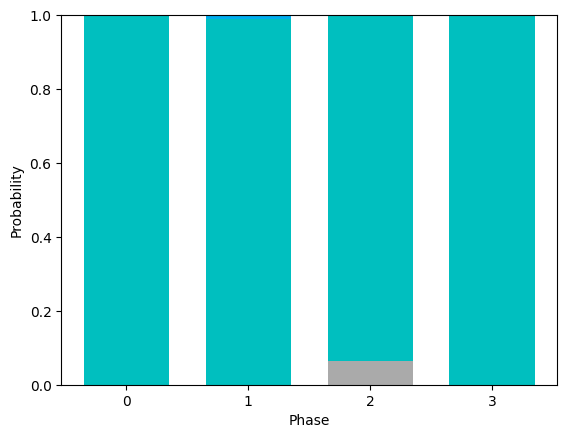

In [94]:
# Plot probability of behavior per phase

# Load data
dataset = 'gap_mdn_cschrimson.csv'
df = pd.read_csv(data_dir+dataset) 

# Initialize variables
behaviors = ['none','cross','abort','backward','fall']
phases = [0,1,2,3]
counts = np.zeros((len(behaviors),len(phases)))
colors = [[204/255,45/255,126/255],
          [0/255,173/255,238/255], 
          [36/255,62/255,144/255],
          [0/255,191/255,191/255],
          [170/255,170/255,170/255]]

# Compute probability 
for phase_index, phase in enumerate(phases):
    df_sub = df[(df["phase"] == phase) & df["behavior"].isin(behaviors)] 
    phase_counts = df_sub.value_counts("behavior", normalize=True).sort_index()
    keys = phase_counts.index.tolist()
    
    for key in keys:
        counts[behaviors.index(key), phase_index] = phase_counts[key]   

# Flip data for plotting
counts = np.flipud(counts)
colors = np.flipud(colors)

# Plot probability
fig, ax = plt.subplots()
for phase in range(counts.shape[1]):
    bottom = 0
    for behavior in range(counts.shape[0]):
        p = ax.bar(phase, counts[behavior, phase], bottom=bottom, width=0.7, label=f"label {i}", color=colors[behavior])
        bottom += counts[behavior, phase]
plt.xticks([0,1,2,3])
plt.ylabel('Probability')
plt.xlabel('Phase')
#plt.savefig(r'C:\Users\Chris\Desktop\figure.eps')
plt.show()

In [80]:
# Print n and N
for phase in phases:
    df_sub = df[(df["phase"] == phase) & df["behavior"].isin(behaviors)] 
    print('Phase '+str(phase)+': N='+str(len(df_sub.animal_id.unique().tolist()))+'; n='+str(len(df_sub)))

Phase 0: N=4; n=4
Phase 1: N=13; n=86
Phase 2: N=13; n=78
Phase 3: N=11; n=35


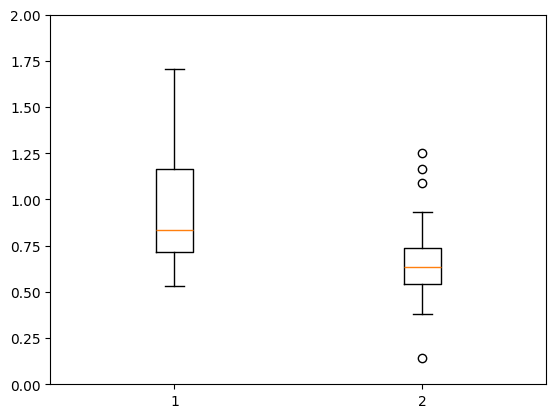

MannwhitneyuResult(statistic=np.float64(1249.5), pvalue=np.float64(2.90616613586972e-06))

In [134]:
# Plot cross duration 

# Load data and calculate duration
dataset = 'gap_empty_cschrimson.csv'
df_ctrl = pd.read_csv(data_dir+dataset)
df_ctrl = df_ctrl.dropna(subset=["cross_start"])
cross_duration_ctrl = (df_ctrl["cross_end"] - df_ctrl["cross_start"]) / sampling_rate
cross_duration_ctrl = cross_duration_ctrl.tolist()

dataset = 'gap_rr_cschrimson.csv'
df_RR = pd.read_csv(data_dir+dataset)
df_RR = df_RR.dropna(subset=["cross_start"])
cross_duration_RR = (df_RR["cross_end"] - df_RR["cross_start"]) / sampling_rate
cross_duration_RR = cross_duration_RR.tolist()

# Plot duration 
plt.boxplot([cross_duration_ctrl, cross_duration_RR], positions=[1,2])
plt.ylim([0,2])
#plt.savefig(r'C:\Users\Chris\Desktop\figure.eps', format='eps', transparent=True)
plt.show()

# Test for normality 
#scipy.stats.normaltest(cross_duration_RR)

# Mann-Whitney U test for non-normally distributed (nonparametric) data
scipy.stats.mannwhitneyu(cross_duration_ctrl,cross_duration_RR)

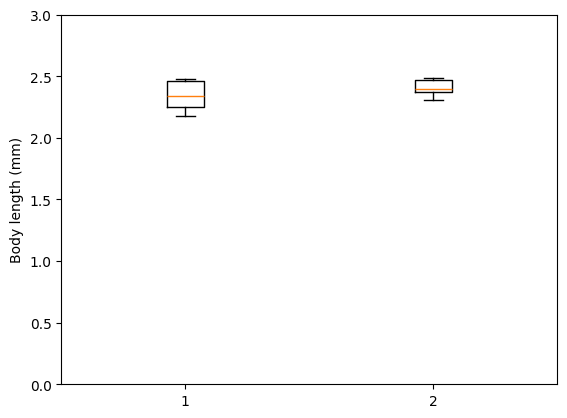

MannwhitneyuResult(statistic=np.float64(33.0), pvalue=np.float64(0.1292812360557783))

In [135]:
# Plot body lengths

# Load data 
# Consider only animals that contributed data to the cross duration analysis above
dataset = 'gap_empty_cschrimson.csv'
df_ctrl = pd.read_csv(data_dir+dataset)
df_ctrl = df_ctrl.dropna(subset=["cross_start"])
df_ctrl = df_ctrl[['animal_id', 'body_length']].drop_duplicates()
length_ctrl = df_ctrl.body_length.tolist()

dataset = 'gap_rr_cschrimson.csv'
df_rr = pd.read_csv(data_dir+dataset)
df_rr = df_rr.dropna(subset=["cross_start"])
df_rr = df_rr[['animal_id', 'body_length']].drop_duplicates()
length_rr = df_rr.body_length.tolist()

# Plot length 
plt.boxplot([length_ctrl, length_rr], positions=[1,2])
plt.ylabel('Body length (mm)')
plt.ylim([0,3])
#plt.savefig(r'C:\Users\Chris\Desktop\figure.eps', format='eps', transparent=True)
plt.show()

# Mann-Whitney U test for non-normally distributed (nonparametric) data
scipy.stats.mannwhitneyu(length_ctrl,length_rr)

In [133]:
len(length_rr)

10

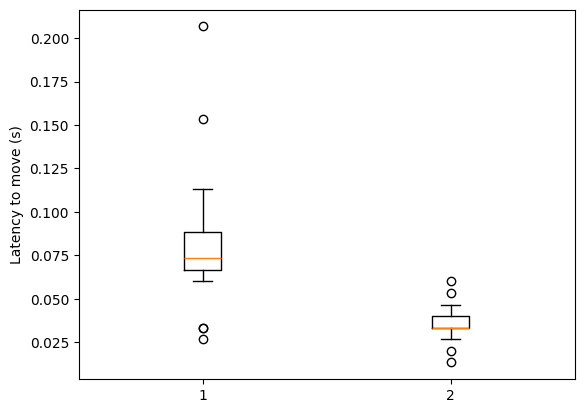

MannwhitneyuResult(statistic=np.float64(2995.5), pvalue=np.float64(6.4169107680108535e-15))

In [136]:
# Plot latency to move

# Load data and calculate latency
dataset = 'gap_rr_cschrimson.csv'
df_RR = pd.read_csv(data_dir+dataset)
df_RR = df_RR.dropna(subset=["movement_onset"])
latency_to_move_RR = (df_RR["movement_onset"] - df_RR["stimulus_onset"]) / sampling_rate
latency_to_move_RR = latency_to_move_RR.tolist()

dataset = 'gap_mdn_cschrimson.csv'
df_MDN = pd.read_csv(data_dir+dataset)
df_MDN = df_MDN.dropna(subset=["movement_onset"])
latency_to_move_MDN = (df_MDN["movement_onset"] - df_MDN["stimulus_onset"]) / sampling_rate
latency_to_move_MDN = latency_to_move_MDN.tolist()

# Plot latency 
plt.boxplot([latency_to_move_RR, latency_to_move_MDN], positions=[1,2])
plt.ylabel('Latency to move (s)')
#plt.savefig(r'C:\Users\Chris\Desktop\gap-crossing.eps', format='eps', transparent=True)
plt.show()

# Mann-Whitney U test for non-normally distributed (nonparametric) data
scipy.stats.mannwhitneyu(latency_to_move_RR,latency_to_move_MDN)

In [82]:
## Kernel density estimation
#X = np.array(latency_to_move_RR)[:,np.newaxis]
#X_plot = np.linspace(0,0.25,1000)[:,np.newaxis]
#kde = KernelDensity(kernel="gaussian", bandwidth=0.005).fit(X)
#log_dens = kde.score_samples(X_plot)
#
#X2 = np.array(latency_to_move_MDN)[:,np.newaxis]
#X2_plot = np.linspace(0,0.25,1000)[:,np.newaxis]
#kde2 = KernelDensity(kernel="gaussian", bandwidth=0.005).fit(X2)
#log_dens2 = kde2.score_samples(X2_plot)
#
#plt.plot(X_plot[:, 0], np.exp(log_dens)/np.max(np.exp(log_dens)))
#plt.plot(X2_plot[:, 0], np.exp(log_dens2)/np.max(np.exp(log_dens2)))
##plt.savefig(r'C:\Users\Chris\Desktop\figure.eps', format='eps', transparent=True)
#plt.show()

In [129]:
# bin_width = 0.1
# bins = np.arange(0-bin_width/2, 2+bin_width, bin_width)
# plt.hist(duration_of_cross_ctrl, bins=bins, density=True)
# plt.xlim([0,2])